In [4]:
import numpy as np
import pandas as pd
import networkx as nx
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
#cargar módulo
from mi_modulo import *

In [3]:
ensayo3_excel = r"C:\Users\V304-17\Documents\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_03.xlsx"
ensayo4_excel = r"C:\Users\V304-17\Documents\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_04.xlsx"
coordenadas_csv = r"C:\Users\V304-17\Documents\GitHub\Neurociencias-2026-1\S03_datasets\MI_coordinates.csv"

ensayo3_dict = pd.read_excel(ensayo3_excel, sheet_name=None, index_col=0)
ensayo4_dict = pd.read_excel(ensayo4_excel, sheet_name=None, index_col=0)

In [ ]:
ensayos3_dfs = lista_dfs(ensayo3_dict)
ensayos4_dfs = lista_dfs(ensayo4_dict)

In [4]:
resultados3_dfs =lista_dfs(ensayo3_dict)
resultado4_dfs

In [5]:
# Filtrado de matrices


In [ ]:
resultado_df= capsula(ensayos_dfs,0.5,0.6)
resultado_df= capsula(ensayos_dfs,0.4,0.7)

<Axes: >

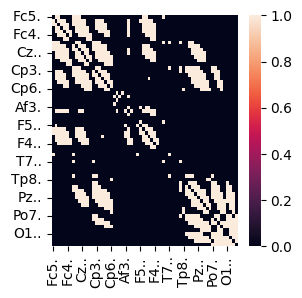

In [6]:
plt.figure(figsize=(3,3))

sns.heatmap(result_df)

In [7]:
stack.shape

(109, 64, 64)

# GENERAR ESTADISTICO PARA DECIDIR UMBRALES

<bound method Axes.legend of <Axes: >>

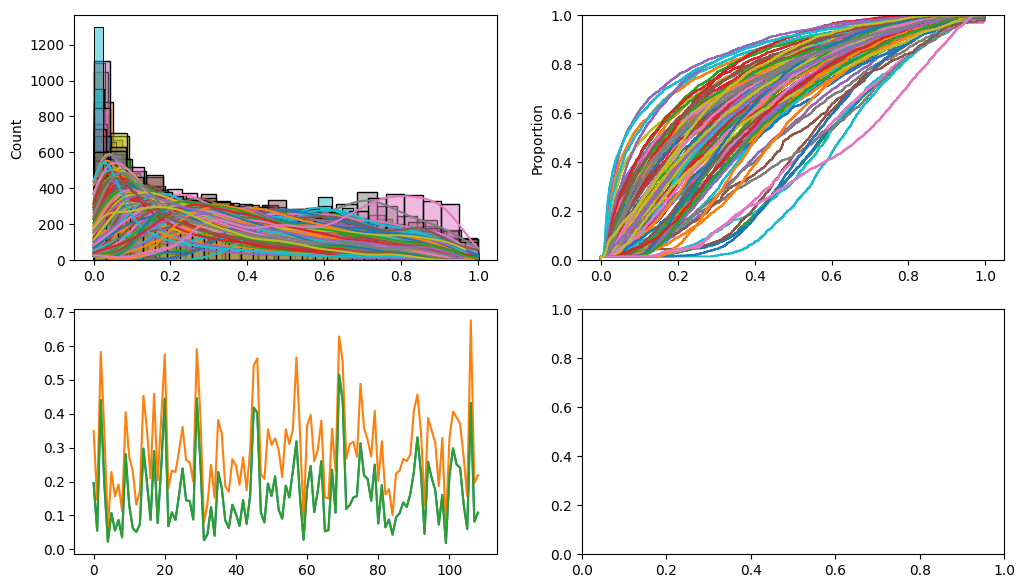

In [8]:

ensayos_dfs

th25, th50, th75, promedio, varianza = [],[],[],[],[]
mu_sigma = []
fig, axes = plt.subplots(2,2, figsize = (12,7))
for sujeto in ensayos_dfs:
    #calcular estadisticos
    data=sujeto.stack().values
    th25.append(np.percentile(data,25))
    th50.append(np.percentile(data,50))
    th75.append(np.percentile(data,75))
    promedio.append(np.mean(data))
    varianza.append(np.std(data))
    mu_sigma.append(np.mean(data) + np.var(data))

 #plots
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
axes[1][0].plot(th25, label='Percentil al 25%')
axes[1][0].plot(th50, label='Percentil al 50%')
axes[1][0].plot(th25, label='Percentil al 75%')
axes[1][0].plot(promedio, label='Media')
axes[1][0].plot(varianza, label='Varianza')
axes[1][0].plot(mu_sigma, label='mu+sigma')
axes[1][0].legend()

In [9]:
from spicy import stats
stats.median_abs_deviation(th25)

np.float64(0.06955915283857339)

In [ ]:
#Hacer dataframe 

In [10]:
estadisticos_df = pd.DataFrame(columns =['th25', 'th50', 'th75', 'promedio', 'mu_sigma'],
                               index= ['min', 'max', 'mediana','cosa_rara'])

columnas =[ th25, th50, th75, promedio, mu_sigma]
min_, max_, mediana_, cosa_ = [],[],[],[]
for columna in columnas:
    d1, d2, d3, d4= np.min(columna), np.max(columna), np.median(columna), stats.median_abs_deviation(columna)
    min_.append(d1)
    max_.append(d2)
    mediana_.append(d3)
    cosa_.append(d4)
estadisticos_df.iloc['min'] = min_
estadisticos_df.iloc['max'] = max_
estadisticos_df.loc['mediana'] = mediana_
estadisticos_df.loc['cosa_rara'] = cosa

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# Generación de resultados
Después del análisis realizado, utilizando los mapas de calor, para poder escoger un treshold adecuado y un porcentaje de la
población que cumpla dicho umbral; se procederá a generar los resultados 
Resultados a generar:
Grafo 2D
Grafo 3D
Métricas de grafo
Gráfico de comunidades con Hub

In [ ]:
#convertir de Data Frame a grafo
ensayo_grafo3 = nx.from_pandas_adjacency (df)

In [ ]:
ensayo3_grafo=grafo2D(resultado

In [ ]:

plt.figure(figsize=(6,4))
axes = [fig.add_subplot(1, 2, 1, projection]
ensayo_grafo =grafo2D(resultado_df3, axes[0])

In [ ]:
def metricas_grafo (G):
    #Métricas
    #Cluster promedio 
    clust_coeff = nx.average_clustering (G)
    #Longitud de camino promedio (Camino má corto)
    try:
        path_length = nx.average_shortest_path_length(G)
    except nx.NetworkxError
        path_length= np.nan #red no conexa
    #Coeficiente de mundo pequeño
    #Comparar con grafo aleatorio de igual N, K
    G_rand = nx.gnm_random_graph(n=G.number_of_nodes(), m=G.number_of_edges())
    clust_rand = nx..average_clustering (G_rand)
    path_rand = nx.average_shortest_path_length (G_rand)
    small_world_sigma = clust_coeff / clust_rand) / (path_length / path_rand)
    #Modularidad
    from networkx.algotithms import community
    communities = community.greedy_modularity_communities(G)
    modularity = community.modularity(G, communities)
    #HUBS
    degree_dict = dict(G.degree())
    betwennees = nx.betwennees_centrality(G)
    betwennees = sorted(betwennees.items(), key=lambda x: x[1], reverse=True)
    #Eficiencia global y local 
    global_eff = nx.global_efficiency(G)
    local_eff =nx.local_efficiency(G)

    return (clust_coeff, path_length, small_world_sigma, communities, 
            modularity, betwennes, global_eff, local_eff, degree_dict)

In [ ]:
(clust_coeff_, path_length_, small_world_sigma, communities_, 
modularity_, betwennes_, global_eff_, local_eff_, degree_dict_) = metricas_grafo(ensayo_grafo)

In [ ]:
metricas_grafo(ensayo_grafo)

In [ ]:
#Construcción DataFramw de coordenadas
eeg_coords = pd.read_csv (coordenadas_csv)
eeg_coords.set_index("Canal", drop=True, inplace=True)

In [ ]:
x, y, z = eeg_coords.loc['x'].values, eeg_coords['y'].values, eeg_coords['z'].values
hub = betwenness_ [0]

plt.figure(figsize=(4,4))
axes = [fig.add_subplot(1, 1, 1, projection ='3d']

nodes_size = [30 if idx != hub[0] else 200 for idx in eeg_coords.index]
axes[0].scatter(x,y,z, alpha= 0.5, s =nodes_size)
for idx, (x_, y_, z_) in enumerate (zip(x,y,z)):
    axes[0].text(x_,y_,z_, eeg_coords.index[idx], fontsize =10)
    if eeg_coords.index[idx] == hub[0]:
    axes[0].text(x_,y_,z_, 'HUB', color='red', fontweights ='bold', fontsize=10)

In [ ]:
comunidad_prueba=communities_[2]
n1, n2= list(comunidad_prueba)[0],(comunidad_prueba)[1]
n1, n2

In [3]:
#Grafo de comunidades 
def grafo_comunidades(comunidades, Hubs, coords, pos):
    x, y, z = eeg_coords.loc['x'].values, eeg_coords['y'].values,coords['z'].values

    nodes_size = [30 if idx != hub[0] else 200 for idx in eeg_coords.index]
    pos.scatter(x,y,z, alpha= 0.5, s =nodes_size)
    for idx, (x_, y_, z_) in enumerate (zip(x,y,z)):
        pos.text(x_,y_,z_, coords.index[idx], fontsize =10)
        if coords.index[idx] == hub[0]:
           pos.text(x_,y_,z_, 'HUB', color='red', fontweights ='bold', fontsize=10)

    colores=['red', 'green',' blue', 'black', 'orange']
    for n_comunidad, comunidad in enumerate(communities_):
        for idx in range (len(comunidad)-1):
        n1, n2 =list(comunidad)[idx], list(comunidad)[idx+1]
        x_=[eeg_coords.loc[n1,'x'], coords.loc[n2, 'x']]
        y_=[eeg_coords.loc[n1,'y'], coords.loc[n2, 'y']]
        z_=[eeg_coords.loc[n1,'z'], coords.loc[n2, 'z']]
        pos.plot(x_,y_,z_,linewidth=3, alpha=0.4, color=colores[n_comunidad])
        
pos.set_title('comunidad ensayo 3')
        

IndentationError: expected an indented block after 'if' statement on line 12 (293830326.py, line 13)

In [ ]:
#Grafo 3D
def grafo3D(coords, Hub, pos):
    x, y, z = eeg_coords.loc['x'].values, eeg_coords['y'].values, eeg_coords['z'].values

    nodes_size = [30 if idx != hub[0] else 200 for idx in coords.index]
    pos.scatter(x,y,z, alpha= 0.5, s =nodes_size)
    for idx, (x_, y_, z_) in enumerate (zip(x,y,z)):
        pos.text(x_,y_,z_, coords.index[idx], fontsize =10)
        if coords.index[idx] == hub[0]:
           pos.text(x_,y_,z_, 'HUB', color='red', fontweights ='bold', fontsize=10)

In [ ]:
hub = betwenness_ [0]

plt.figure(figsize=(4,4))
axes = [fig.add_subplot(1, 2, 1, projection ='3d'),
        fig.add_subplot(1,2,2

In [ ]:
#Graafo comunidades
hub = betwenness_[0]

fig = plt.figure(figsize=(12, 8))
axes = [flg.add_subplot(2,2,1, projection ='3d'),
        flg.add_subplot(2,2,2, projection ='3d'),
        flg.add_subplot(2,2,3)]
